In [7]:
from typing import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("paper", font_scale=1.5)
matplotlib.rc("font", family="serif", serif=["CMU Serif"])
matplotlib.rc("text", usetex=True)
# matplotlib.rc("font", family="sans-serif"); matplotlib.rc("text", usetex=False)
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
matplotlib.font_manager.findfont("CMU Serif", rebuild_if_missing=True)

'/nethome/douglaso/work/LLMInference/.venv/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [8]:
def arithmetic_intensity(rho: float, g: float, B: int) -> float:
    return (6 * B + rho * g * B) / (6 + rho * B)

dfi = pd.DataFrame.from_dict(
    [dict(rho=rho, B=B, g=g, ai=arithmetic_intensity(rho=rho, g=g, B=B))
     for rho in 2**np.arange(-6, 6.01, 1)
     for B in (2**np.arange(0, 10.01, .25)).astype(np.int32)
     for g in [1, 8]]
)

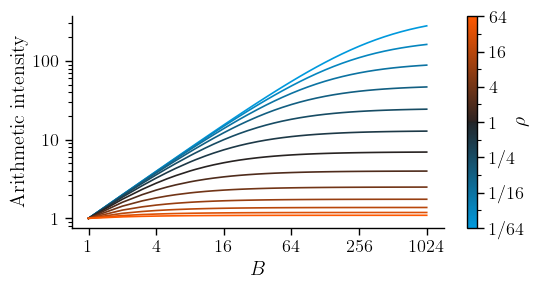

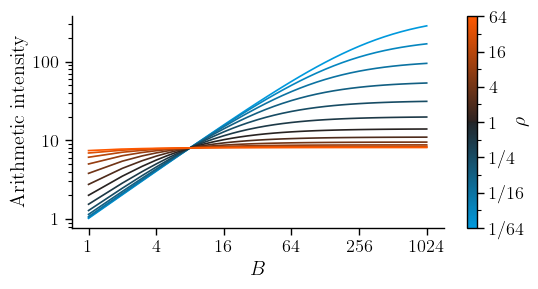

In [11]:
for g, d in dfi.groupby("g"):
    plt.figure(figsize=(6, 2.75))
    norm = matplotlib.colors.SymLogNorm(vmin=d.rho.min(), vmax=d.rho.max(), linthresh=1e-5, base=2)
    palette = sns.diverging_palette(240, 20, s=100, l=60, center="dark", as_cmap=True)
    ax = sns.lineplot(data=d, y="ai", x="B", hue="rho", hue_norm=norm, palette=palette)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=palette, norm=norm), ax=ax)
    cbar.set_label(r"$\rho$", labelpad=-10)
    cbar.ax.yaxis.set_major_formatter(lambda x, _: f"1/{1/x:.0f}" if x < 1 else f"{x:.0f}")
    cbar.ax.set_yticks([1/64, 1/16, 1/4, 1, 4, 16, 64])
    ax.legend_.remove()
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter("{x:.0f}")
    ax.set_xticks([1, 4, 16, 64, 256, 1024])
    ax.set_yscale("log")
    ax.yaxis.set_major_formatter("{x:.0f}")
    ax.set_xlabel("$B$")
    ax.set_ylabel("Arithmetic intensity")
    sns.despine(ax=ax)
    plt.savefig(f"out/arithmetic_intensity_g{g}.pdf", bbox_inches="tight")

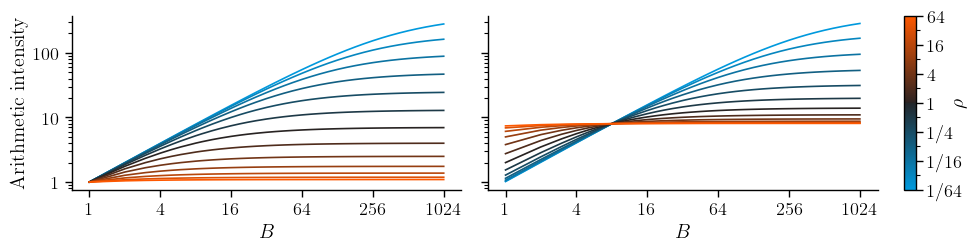

In [49]:
# _, axs = plt.subplots(1, 3, figsize=(10, 3.5), width_ratios=(1, 1, .05))
fig = plt.figure(figsize=(10, 2.75))
grid = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1, 1, .03])
axs = []
for i in range(3):
    axs.append(fig.add_subplot(grid[i], sharey=axs[0] if i == 1 else None))
norm = matplotlib.colors.SymLogNorm(vmin=dfi.rho.min(), vmax=dfi.rho.max(), linthresh=1e-5, base=2)
palette = sns.diverging_palette(240, 20, s=100, l=60, center="dark", as_cmap=True)
for ax, g in zip(axs, [1, 8]):
    sns.lineplot(data=dfi[dfi.g == g], y="ai", x="B", hue="rho", hue_norm=norm, palette=palette, ax=ax)
    ax.legend_.remove()
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter("{x:.0f}")
    ax.set_xticks([1, 4, 16, 64, 256, 1024])
    ax.set_xlabel("$B$")
    sns.despine(ax=ax)
axs[0].set_yscale("log")
axs[0].yaxis.set_major_formatter("{x:.0f}")
axs[0].set_ylabel("Arithmetic intensity")
axs[1].tick_params(axis="y", which="both", labelleft=False)
axs[1].set_ylabel("")
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=palette, norm=norm), cax=axs[-1])
cbar.set_label(r"$\rho$", labelpad=-10)
cbar.ax.yaxis.set_major_formatter(lambda x, _: f"1/{1/x:.0f}" if x < 1 else f"{x:.0f}")
cbar.ax.set_yticks([1/64, 1/16, 1/4, 1, 4, 16, 64])
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(f"out/arithmetic_intensity.pdf", bbox_inches="tight")